
![D.lensalot logo](./../../res/dlensalot2.PNG)

# Interactive minimal working example - OBD matrix
In this tutorial you generate an overlapping B-mode deprojection matrix, and apply it to a noisemodel using a masked sky.
At the end of this tutorial, you will plot the power spectrum of a single simulation, and deproject its B-modes using the OBD matrix.

This tutorial uses two configuration files. The [first](https://github.com/NextGenCMB/D.lensalot/blob/sv3.1/lenscarf/ana/config/examples/mwe/conf_mwe_buildOBD.py) is for generating the OBD matrix, and you can freely change the parameters to your liking. 

The 
 * `DLENSALOT_Analysis` is mainly needed for pointing D.lensalot to the mask you will generate in this notebook,
 * `DLENSALOT_Noisemodel` configures the noise model. You should choose the setting applicable to the simulations and/or data you'd like to deproject,
 * `DLENSALOT_OBD` defines where the Matrix temp and final files are stored and other simulation and/or data specific settings

Notes
 * perft cancellation? why?
 * Why does the filtered spectrum look like this

In [1]:
import os
from os.path import join as opj

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

import lenscarf
from lenscarf.run import run
from lenscarf.lerepi.visalot import plot_helper as ph

cond4mpi does not exists
could not setup healpix hack. reverting to standard healpy
MSC: using scarf with 2 OMP threads


# Create mask
Due to masking the noise model is no longer isotropic.

fsky: 0.083


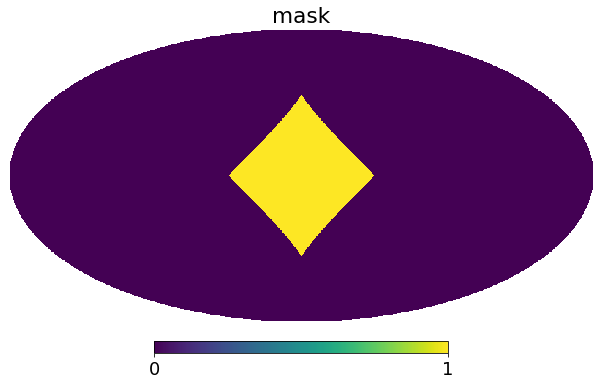

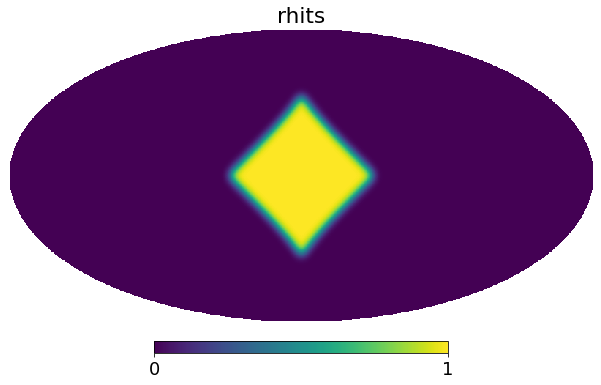

In [13]:
m = np.zeros(hp.nside2npix(1))
m[[4]] = 1 #4,5,6,7,8,9,10,11
nside = 512
rhits = np.abs(hp.smoothing(hp.ud_grade(m, nside_out=nside),0.1))
mask = hp.ud_grade(m, nside_out=nside)
hp.mollview(mask, nest=False, title='mask')
hp.mollview(rhits, nest=False, title='rhits')
print('fsky: {:.3f}'.format(np.mean(m)))

mask_fn = opj(os.environ['SCRATCH'], 'OBDmatrix', 'nside512_lmax1024_lcut100/mask.fits')
rhits_fn = opj(os.environ['SCRATCH'], 'OBDmatrix', 'nside512_lmax1024_lcut100/rhits.fits')

if not os.path.isdir(os.path.dirname(mask_fn)):
    os.makedirs(os.path.dirname(mask_fn))
    
if not os.path.isfile(mask_fn):
    hp.write_map(mask_fn, mask)
    hp.write_map(rhits_fn, rhits)
    print('mask stored at {}'.format(mask_fn))

# Create the OBD matrix
This may take a while (~30minutes), go grab a coffee

In [14]:
fn = opj(os.path.dirname(lenscarf.__file__), 'ana/config/examples/mwe/conf_mwe_buildOBD.py')
ana_mwe = run(config=fn, job_id='build_OBD', verbose=True).job
ana_mwe.run()

INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /global/u2/s/sebibel/git/lenscarf/lenscarf/ana/config/examples/mwe/conf_mwe_buildOBD.py
INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - store() Started
INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /global/cscratch1/sd/sebibel/OBDmatrix/nside512_lmax1024_lcut100/conf_mwe_buildOBD.py
INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-09 13:40:: root.store - config file look the same. Resuming where I left off last time.
INFO:: 02-09 13:40:: root.store - Matching config file found. Resuming where I left off.
INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - store() Finished
INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - collect_jobs() Started
INFO:: 02-09 13:40:: lenscarf.lerepi.core.handler.log - collect_jobs() Finished
INF

In [15]:
print(ana_mwe)

TEMP:                	/global/cscratch1/sd/sebibel/OBDmatrix/nside512_lmax1024_lcut100
tr:                  	2
TEMP_suffix:         	('',)
mask_fn:             	/global/cscratch1/sd/sebibel/OBDmatrix/nside512_lmax1024_lcut100/mask.fits
nside:               	512
libdir:              	/global/cscratch1/sd/sebibel/OBDmatrix/nside512_lmax1024_lcut100
nlev_dep:            	10000.0
beam:                	1
lmax:                	1024
lmin_b:              	100
geom:                	<scarf.Geometry object at 0x1554d62118f0>
masks:               	<class 'list'>
rhits_map:           	<class 'numpy.ndarray'>
nlev_p:              	1.4142135623730951
ninv_p_desc:         	<class 'list'>
ninv_p:              	<class 'numpy.ndarray'>
jobs:                	<class 'list'>



# Apply to simulation data
The second [configuration file](https://github.com/NextGenCMB/D.lensalot/blob/sv3.1/lenscarf/ana/config/examples/mwe/conf_mwe_applyOBD.py)
generates a single simulated CMB inclusive of some noise, applies the above generated mask, and applies the OBD matrix on the noise-model to correctly deproject the B-modes

In [2]:
fn = opj(os.path.dirname(lenscarf.__file__), 'ana/config/examples/mwe/conf_mwe_applyOBD.py')
ana_mwe = run(config=fn, job_id='QE_lensrec', verbose=True).job
ana_mwe.run()

INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /global/u2/s/sebibel/git/lenscarf/lenscarf/ana/config/examples/mwe/conf_mwe_applyOBD.py
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - store() Started
INFO:: 02-10 10:06:: root.store - config file stored at /global/cscratch1/sd/sebibel/dlensalot/lenscarf/generic/sims_cmb_len_OBD_my_first_dlensalot_analysis_applyOBD_nsidelens512_new/conf_mwe_applyOBD.py
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - store() Finished
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - collect_jobs() Started
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - collect_jobs() Finished
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - get_jobs() Started
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - get_jobs() Finished
INFO:: 02-10 10:06:: lenscarf.lerepi.core.handler.log - init_job() Started
INFO:: 02-10

/global/u2/s/sebibel/git/plancklens/plancklens/filt/filt_cinv.py:161: RuntimeWarning: divide by zero encountered in true_divide
  ftl = utils.cli(s_cls['tt'][0:self.lmax + 1] + (NlevT_uKamin * np.pi / 180. / 60.) ** 2 / b_transf[0:self.lmax + 1] ** 2)


jit: instantiating ctype = <class 'plancklens.qcinv.multigrid.multigrid_chain'>
jit: instantiating ctype = <class 'lenscarf.opfilt.bmodes_ninv.eblm_filter_ninv'>
INFO:: 02-10 10:07:: lenscarf.opfilt.bmodes_ninv.__init__ - *** alm_filter_ninv: switching to same ninv_geometry but with unit weights
INFO:: 02-10 10:07:: lenscarf.opfilt.bmodes_ninv.__init__ - Loading /global/cscratch1/sd/sebibel/OBDmatrix/nside512_lmax1024_lcut100/tniti.npy
ninv_febl: using 5.07 uK-amin noise Cl
INFO:: 02-10 10:07:: lenscarf.opfilt.utils_cinv_p._calc_febl - cinv_p::noiseP_uk_arcmin = 1.463
Caching sky fractions...
INFO:: 02-10 10:07:: lenscarf.lerepi.core.transformer.lerepi2dlensalot.log - _process_Qerec() finished
INFO:: 02-10 10:07:: lenscarf.lerepi.core.transformer.lerepi2dlensalot.log - _process_Itrec() started
INFO:: 02-10 10:07:: lenscarf.lerepi.core.transformer.lerepi2dlensalot.log - _process_Itrec() finished
INFO:: 02-10 10:07:: lenscarf.lerepi.core.transformer.lerepi2dlensalot.build - 
Configuratio

# Check result
You can test if it worked by plotting the B spectra after Wiener-filtering, and should see that `ivf_b` drops low for all multipoles $\ell<\ell_{min,b}$

In [8]:
ivf_e, ivf_b = ana_mwe.cinv_p.apply_ivf([hp.alm2map(ana_mwe._sims.get_sim_elm(0), nside=512), hp.alm2map(ana_mwe._sims.get_sim_blm(0), nside=512)])

( 512, 1024) [00:00:03] (0, 1.00000000)
( 512, 1024) [00:00:05] (1, 0.38938658)
( 512, 1024) [00:00:07] (2, 0.10079783)
( 512, 1024) [00:00:09] (3, 0.03930950)
( 512, 1024) [00:00:11] (4, 0.01580794)
( 512, 1024) [00:00:14] (5, 0.00864444)
( 512, 1024) [00:00:16] (6, 0.00615360)
( 512, 1024) [00:00:18] (7, 0.00498466)
( 512, 1024) [00:00:20] (8, 0.00433848)
( 512, 1024) [00:00:22] (9, 0.00364166)
( 512, 1024) [00:00:24] (10, 0.00295305)
( 512, 1024) [00:00:26] (11, 0.00235176)
( 512, 1024) [00:00:28] (12, 0.00185493)
( 512, 1024) [00:00:31] (13, 0.00150610)
( 512, 1024) [00:00:33] (14, 0.00135820)
( 512, 1024) [00:00:35] (15, 0.00126013)
( 512, 1024) [00:00:37] (16, 0.00119962)
( 512, 1024) [00:00:39] (17, 0.00118821)
( 512, 1024) [00:00:41] (18, 0.00112814)
( 512, 1024) [00:00:43] (19, 0.00105427)
( 512, 1024) [00:00:45] (20, 0.00096838)


/global/homes/s/sebibel/.conda/envs/py3.7p/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


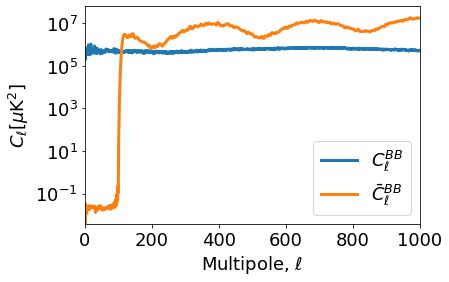

In [9]:
b = ana_mwe._sims.get_sim_blm(0)
plt.plot(1/hp.alm2cl(b), label='$C_\ell^{BB}$', lw=3)
plt.plot(hp.alm2cl(ivf_b), label=r'$\bar{C}_\ell^{BB}$', lw=3)
plt.yscale('log')
plt.xlim(0,1000)

plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')
plt.legend()
plt.show()

/global/homes/s/sebibel/.conda/envs/py3.7p/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


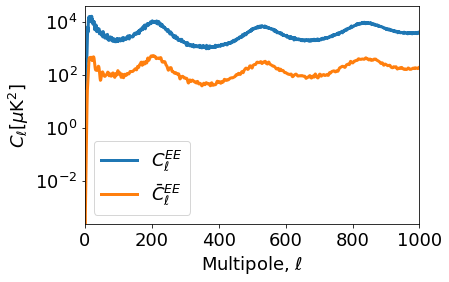

In [14]:
e = ana_mwe._sims.get_sim_elm(0)
plt.plot(1/hp.alm2cl(e), label='$C_\ell^{EE}$', lw=3)
plt.plot(hp.alm2cl(ivf_e), label=r'$\bar{C}_\ell^{EE}$', lw=3)
plt.yscale('log')
plt.xlim(0,1000)

plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')
plt.legend()
plt.show()

In [4]:
a = hp.read_alm('/global/cscratch1/sd/sebibel/dlensalot/lenscarf/generic/sims_cmb_len_OBD_my_first_dlensalot_analysis_applyOBD_nsidelens512_new/ivfs/sim_0000_elm.fits')
b = hp.read_alm('/global/cscratch1/sd/sebibel/dlensalot/lenscarf/generic/sims_cmb_len_OBD_my_first_dlensalot_analysis_applyOBD_nsidelens512_new/ivfs/sim_0000_blm.fits')

In [5]:
b_sim = ana_mwe._sims.get_sim_blm(0)

/global/homes/s/sebibel/.conda/envs/py3.7p/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


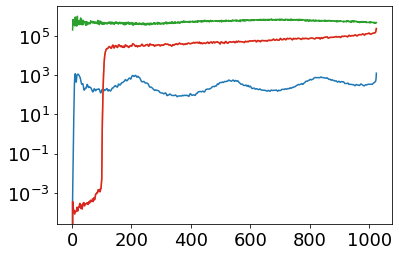

In [6]:
plt.plot(hp.alm2cl(a))
plt.plot(hp.alm2cl(b))
plt.plot(1/hp.alm2cl(b_sim))

plt.plot(hp.alm2cl(b))
plt.yscale('log')